In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def barplot_with_CI_errorbars(df, x_label, y_label, y_lower_label, y_upper_label):
    """Creates bar plot of a given dataframe with asymmetric error bars for y axis.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        y_lower_label: str, column name of lower error values of y axis
        y_upper_label: str, column name of upper error values of y axis

    """
    # Column names for new columns for delta y_err which is calculated as | y_err - y |
    delta_lower_yerr_label = "$\Delta$" + y_lower_label
    delta_upper_yerr_label = "$\Delta$" + y_upper_label
    data = df  # Pandas DataFrame
    data[delta_lower_yerr_label] = data[y_label] - data[y_lower_label]
    data[delta_upper_yerr_label] = data[y_upper_label] - data[y_label]

    # Color
    current_palette = sns.color_palette()
    sns_color = current_palette[1]

    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    #plt.tight_layout()

    # Plot
    x = range(len(data[y_label]))
    y = data[y_label]
    plt.bar(x, y)
    plt.xticks(x, data[x_label], rotation=90)
    plt.errorbar(x, y, yerr=(data[delta_lower_yerr_label], data[delta_upper_yerr_label]),
                 fmt="none", ecolor=sns_color, capsize=3, capthick=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    


In [7]:
# Read collection
output_directory_path = "./analysis_of_typeIII_predictions/analysis_outputs_closest"
collection_file_path = os.path.join(output_directory_path, "typeIII_submission_collection.csv")

df_collection = pd.read_csv(collection_file_path, index_col=[0])
#print(df_collection.head())

# Select one submission
receipt_ID = "0hxtm"
df_submission = df_collection.loc[df_collection["receipt_id"] == receipt_ID]

# Calculate 
df_submission["absolute error"] = np.NaN
df_submission.loc[:,"absolute error"] =  np.absolute(df_submission.loc[:,"$\Delta$pKa error (calc - exp)"])
df_submission.head()                                  
                

/Users/isikm/opt/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/isikm/opt/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,$\Delta$pKa error (calc - exp),Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id,absolute error
0,0.18,SM01,COSMOtherm_FINE17,9.71,9.53,SM01_pKa1,0.65,0.01,Chris Loschen,0hxtm,0.18
1,1.18,SM02,COSMOtherm_FINE17,6.21,5.03,SM02_pKa1,0.65,0.01,Chris Loschen,0hxtm,1.18
2,-6.39,SM03,COSMOtherm_FINE17,0.63,7.02,SM03_pKa1,0.65,0.01,Chris Loschen,0hxtm,6.39
3,-0.61,SM04,COSMOtherm_FINE17,5.41,6.02,SM04_pKa1,0.65,0.01,Chris Loschen,0hxtm,0.61
4,-0.06,SM05,COSMOtherm_FINE17,4.53,4.59,SM05_pKa1,0.65,0.01,Chris Loschen,0hxtm,0.06


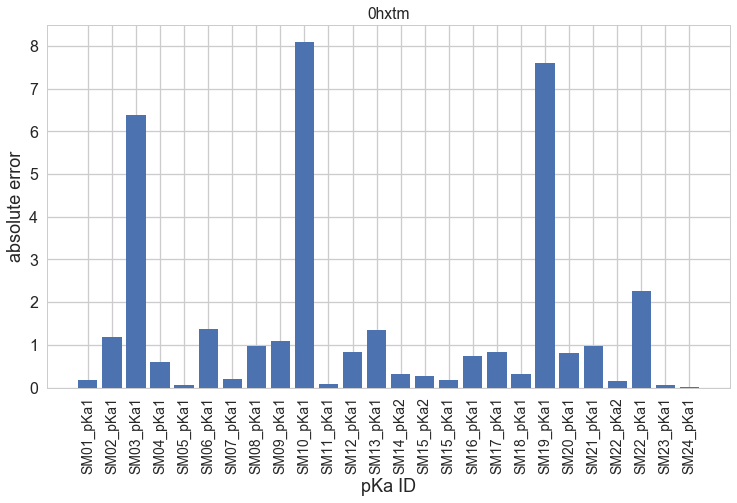

In [21]:
def barplot(df, x_label, y_label, title):
    """Creates bar plot of a given dataframe.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
      
    """
    
    # Color
    current_palette = sns.color_palette()
    sns_color = current_palette[1]

    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    #plt.tight_layout()

    # Plot
    data = df
    x = range(len(data[y_label]))
    y = data[y_label]
    plt.bar(x, y)
    plt.xticks(x, data[x_label], rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()

barplot(df=df_submission, x_label="pKa ID", y_label="absolute error", title=receipt_ID)
plt.savefig("plot.pdf")
plt.show()